**1. Importing Libraries**

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from string import ascii_letters
from scipy.stats import pearsonr
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from matplotlib.pyplot import figure
import matplotlib.dates as md

**2. Read csv,xlsx**

In [10]:
insight1=pd.read_csv("/content/drive/MyDrive/insight_001.csv")
insight2=pd.read_excel("/content/drive/MyDrive/insight_002.xlsx")

**3. Preview of files**

In [ ]:
insight1.head(2)

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,Weekly Organic Reach,28 Days Organic Reach,Daily Paid Reach,Weekly Paid Reach,28 Days Paid Reach,Daily Viral Reach,Weekly Viral Reach,28 Days Viral Reach,Daily Total Impressions,Weekly Total Impressions,28 Days Total Impressions,Daily Organic impressions,Weekly Organic impressions,28 Days Organic impressions,Daily Paid Impressions,Weekly Paid Impressions,28 Days Paid Impressions,Daily Viral impressions,Weekly Viral impressions,28 Days Viral impressions,Daily Logged-in Page Views,Weekly Logged-in Page Views,Daily Logged-in Page Views.1,Weekly Logged-in Page Views.1,Daily Reach Of Page Posts,Weekly Reach Of Page Posts,28 Days Reach Of Page Posts,Daily Organic Reach of Page posts,Weekly Organic Reach of Page posts,...,Daily Total web site click count per Page by age and gender - 45-54.U,Daily Total web site click count per Page by age and gender - 55-64.F,Daily Total web site click count per Page by age and gender - 55-64.M,Daily Total web site click count per Page by age and gender - 55-64.U,Daily Total web site click count per Page by age and gender - 65+.F,Daily Total web site click count per Page by age and gender - 65+.M,Daily Total web site click count per Page by age and gender - 65+.U,Daily Total web site click count per Page by age and gender - &lt;13.F,Daily Total web site click count per Page by age and gender - &lt;13.M,Daily Total web site click count per Page by age and gender - &lt;13.U,Daily Total web site click count per Page by age and gender - UNKNOWN.F,Daily Total web site click count per Page by age and gender - UNKNOWN.M,Daily Total web site click count per Page by age and gender - UNKNOWN.U,Weekly Total web site click count per Page by age and gender - 13-17.F,Weekly Total web site click count per Page by age and gender - 13-17.M,Weekly Total web site click count per Page by age and gender - 13-17.U,Weekly Total web site click count per Page by age and gender - 18-24.F,Weekly Total web site click count per Page by age and gender - 18-24.M,Weekly Total web site click count per Page by age and gender - 18-24.U,Weekly Total web site click count per Page by age and gender - 25-34.F,Weekly Total web site click count per Page by age and gender - 25-34.M,Weekly Total web site click count per Page by age and gender - 25-34.U,Weekly Total web site click count per Page by age and gender - 35-44.F,Weekly Total web site click count per Page by age and gender - 35-44.M,Weekly Total web site click count per Page by age and gender - 35-44.U,Weekly Total web site click count per Page by age and gender - 45-54.F,Weekly Total web site click count per Page by age and gender - 45-54.M,Weekly Total web site click count per Page by age and gender - 45-54.U,Weekly Total web site click count per Page by age and gender - 55-64.F,Weekly Total web site click count per Page by age and gender - 55-64.M,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,NaN,Lifetime: The total number of people who have ...,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Weekly: The number of pe

In [ ]:
insight1.shape

(29, 1226)

In [ ]:
insight2.head(2)

,Post ID,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of unique people who enga...,Lifetime: The number of people who matched the...,Lifetime: The number of clicks anywhere in you...,Lifetime: The number of people who have given ...,Lifetime: The number of times people have give...,Lifetime: The number of impressions of your Pa...,Lifetime: The number of people who saw your Pa...,Lifetime: The number of paid impressions of yo...,Lifetime: The number of people who like your P...,Lifetime: The number of people who have liked ...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Average time video viewed (Total Count),Lifetime: Length of a video post (Total Count)
1,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,NaN,NaN,2018-06-22 07:58:04,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
insight2.shape

(292, 33)

In [ ]:
insight1.dtypes[1100:]

Weekly Total get direction click count per Page by age and gender - 35-44.F    float64
Weekly Total get direction click count per Page by age and gender - 35-44.M    float64
Weekly Total get direction click count per Page by age and gender - 35-44.U    float64
Weekly Total get direction click count per Page by age and gender - 45-54.F    float64
Weekly Total get direction click count per Page by age and gender - 45-54.M    float64
                                                                                ...   
Weekly Total web site click count per Page by age and gender - &lt;13.M        float64
Weekly Total web site click count per Page by age and gender - &lt;13.U        float64
Weekly Total web site click count per Page by age and gender - UNKNOWN.F       float64
Weekly Total web site click count per Page by age and gender - UNKNOWN.M       float64
Weekly Total web site click count per Page by age and gender - UNKNOWN.U       float64
Length: 126, dtype: object

In [ ]:
insight2.dtypes[:]

Post_ID                                                                        object
Post_Message                                                                   object
Type                                                                           object
Countries                                                                     float64
Languages                                                                     float64
Posted                                                                 datetime64[ns]
Audience_Targeting                                                             object
Lifetime_Post_Total_Reach                                                      object
Lifetime_Post_organic_reach                                                    object
Lifetime_Post_Paid_Reach                                                       object
Lifetime_Post_Total_Impressions                                                object
Lifetime_Post_Organic_Impressions                     

**4. Replacing Null values**

In [11]:
#from 3rd fow 8th column
insight2[2:][7:].fillna( 0, inplace = True) 

In [12]:
#from 3rd row 2nd column
insight1[2:][1:].fillna( 0, inplace = True) 

**5. Remove Spaces from column name for future use**

In [13]:
#insight2
insight2.columns = insight2.columns.str.replace(' ', '_')

**6. Reset index function**

In [14]:
def reset(a):
  a.reset_index(inplace=True)
  del a["index"]

# **Working with insight2**

**1. Sorting insight2 data by date**

In [15]:
#ascending
insight2=insight2.sort_values(by = 'Posted')

In [16]:
# reset the index
insight2.reset_index(inplace=True)

In [17]:
#shifting last row to 1st as its 2nd header
insight2=insight2.apply(np.roll, shift=1)

In [18]:
# delete the index
del insight2['index']

In [ ]:
insight2

,Post_ID,Post_Message,Type,Countries,Languages,Posted,Audience_Targeting,Lifetime_Post_Total_Reach,Lifetime_Post_organic_reach,Lifetime_Post_Paid_Reach,Lifetime_Post_Total_Impressions,Lifetime_Post_Organic_Impressions,Lifetime_Post_Paid_Impressions,Lifetime_Engaged_Users,Lifetime_Matched_Audience_Targeting_Consumers_on_Post,Lifetime_Matched_Audience_Targeting_Consumptions_on_Post,Lifetime_Negative_Feedback_from_Users,Lifetime_Negative_Feedback,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page,Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,Lifetime_Organic_views_to_95%,Lifetime_Organic_views_to_95%.1,Lifetime_Paid_views_to_95%,Lifetime_Paid_views_to_95%.1,Lifetime_Organic_Video_Views,Lifetime_Organic_Video_Views.1,Lifetime_Paid_Video_Views,Lifetime_Paid_Video_Views.1,Lifetime_Average_time_video_viewed,Lifetime_Video_length
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of unique people who enga...,Lifetime: The number of people who matched the...,Lifetime: The number of clicks anywhere in you...,Lifetime: The number of people who have given ...,Lifetime: The number of times people have give...,Lifetime: The number of impressions of your Pa...,Lifetime: The number of people who saw your Pa...,Lifetime: The number of paid impressions of yo...,Lifetime: The number of people who like your P...,Lifetime: The number of people who have liked ...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Average time video viewed (Total Count),Lifetime: Length of a video post (Total Count)
1,1277547548992987_1558545057559900,2017. A year in which AUST Innovation and Desi...,Photo,0.0,0.0,2017-12-31 09:58:18,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1277547548992987_1559714227442983,"As we step into a new year, we thought we'd li...",Video,0.0,0.0,2018-01-01 04:20:56,,2294,2294,0,3715,3715,0,242,191,302,0,0,2238,1368,0,0,183,48,55,0,0,550,672,0,0,15184,132073
3,1277547548992987_1560107000737039,AUST Innovation and Design club proudly brings...,Link,0.0,0.0,2018-01-01 10:58:33,,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1277547548992987_1562771390470600,Poster Maestros commenced with a purpose to se...,Photo,0.0,0.0,2018-01-03 09:37:45,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1277547548992987_3810522799028770,"'অ আ ক খ' তেই শুরু আমার কথার,আমার বাংলা ভাষার।...",Photo,0.0,0.0,2021-02-21 00:04:42,,1646,1646,0,1770,1770,0,94,24,26,0,0,1078,975,0,0,81,0,0,0,0,0,0,0,0,0,0
288,1277547548992987_3820585731355810,To enlighten the visual representation and ana...,Photo,0.0,0.0,2021-02-24 09:19:43,,1808,1808,0,2040,2040,0,165,106,143,1,1,1685,1458,0,0,150,0,0,0,0,0,0,0,0,0,0
289,1277547548992987_3842283869185996,Event Link: https://www.facebook.com/events/26...,Video,0.0,0.0,2021-03-02 08:58:40,,2637,2637,0,2954,2954,0,306,252,328,0,0,1419,1242,0,0,226,100,120,0,0,734,1046,0,0,5518,35093
290,1277547548992987_3844788702268846,"So, are you the next Da Vinci of AUST? Do you ...",Photo,0.0,0.0,2021-03-03 09:01:38,,4039,4039,0,4223,4223,

**2. Adding date and time column and fill them separately with Posted column**

In [19]:
#copy of insight2
insight2_copy = insight2[1:].copy()

In [20]:
# reset the index
reset(insight2_copy)

In [21]:
insight2_copy['Dates'] = pd.to_datetime(insight2_copy['Posted'], format='%Y:%M:%D').dt.date
insight2_copy['Hours'] = pd.to_datetime(insight2_copy['Posted'], format='%Y:%M:%D').dt.time

In [22]:
insight2_copy

,Post_ID,Post_Message,Type,Countries,Languages,Posted,Audience_Targeting,Lifetime_Post_Total_Reach,Lifetime_Post_organic_reach,Lifetime_Post_Paid_Reach,Lifetime_Post_Total_Impressions,Lifetime_Post_Organic_Impressions,Lifetime_Post_Paid_Impressions,Lifetime_Engaged_Users,Lifetime_Matched_Audience_Targeting_Consumers_on_Post,Lifetime_Matched_Audience_Targeting_Consumptions_on_Post,Lifetime_Negative_Feedback_from_Users,Lifetime_Negative_Feedback,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page,Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,Lifetime_Organic_views_to_95%,Lifetime_Organic_views_to_95%.1,Lifetime_Paid_views_to_95%,Lifetime_Paid_views_to_95%.1,Lifetime_Organic_Video_Views,Lifetime_Organic_Video_Views.1,Lifetime_Paid_Video_Views,Lifetime_Paid_Video_Views.1,Lifetime_Average_time_video_viewed,Lifetime_Video_length,Dates,Hours
0,1277547548992987_1558545057559900,2017. A year in which AUST Innovation and Desi...,Photo,0.0,0.0,2017-12-31 09:58:18,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-12-31,09:58:18
1,1277547548992987_1559714227442983,"As we step into a new year, we thought we'd li...",Video,0.0,0.0,2018-01-01 04:20:56,,2294,2294,0,3715,3715,0,242,191,302,0,0,2238,1368,0,0,183,48,55,0,0,550,672,0,0,15184,132073,2018-01-01,04:20:56
2,1277547548992987_1560107000737039,AUST Innovation and Design club proudly brings...,Link,0.0,0.0,2018-01-01 10:58:33,,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-01,10:58:33
3,1277547548992987_1562771390470600,Poster Maestros commenced with a purpose to se...,Photo,0.0,0.0,2018-01-03 09:37:45,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-01-03,09:37:45
4,1277547548992987_1564914663589606,Don Sumdany sends a message to AUSTIANS welcom...,Video,0.0,0.0,2018-01-04 22:24:49,,3887,3887,0,9231,9231,0,348,296,490,0,0,4572,1700,0,0,243,78,84,0,0,721,885,0,0,8296,75764,2018-01-04,22:24:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1277547548992987_3810522799028770,"'অ আ ক খ' তেই শুরু আমার কথার,আমার বাংলা ভাষার।...",Photo,0.0,0.0,2021-02-21 00:04:42,,1646,1646,0,1770,1770,0,94,24,26,0,0,1078,975,0,0,81,0,0,0,0,0,0,0,0,0,0,2021-02-21,00:04:42
287,1277547548992987_3820585731355810,To enlighten the visual representation and ana...,Photo,0.0,0.0,2021-02-24 09:19:43,,1808,1808,0,2040,2040,0,165,106,143,1,1,1685,1458,0,0,150,0,0,0,0,0,0,0,0,0,0,2021-02-24,09:19:43
288,1277547548992987_3842283869185996,Event Link: https://www.facebook.com/events/26...,Video,0.0,0.0,2021-03-02 08:58:40,,2637,2637,0,2954,2954,0,306,252,328,0,0,1419,1242,0,0,226,100,120,0,0,734,1046,0,0,5518,35093,2021-03-02,08:58:40
289,1277547548992987_3844788702268846,"So, are you the next Da Vinci of AUST? Do you ...",Photo,0.0,0.0,2021-03-03 09:01:38,,4039,4039,0,4223,4223,0,132,99,130,0,0,2002,1933,0,0,104,0,0,0,0,0,0,0,0,0,0,2021-03-03,09:01:38


In [23]:
#adding what day it was
insight2_copy['day_of_week'] = insight2_copy['Posted'].dt.day_name()

**3. Analysis Part**



*   **Weekends reach more audience?**



In [24]:
#converting column types for making graph
insight2_copy[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach"]] = insight2_copy[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach"]].astype(float, errors = 'raise')

In [25]:
#if dayes are weekend
weekend=insight2_copy[(insight2_copy['day_of_week']=="Friday") | (insight2_copy['day_of_week']=="Saturday")]
weekend.shape

(89, 36)

In [26]:
#if dayes are not weekend
notweekend=insight2_copy[(insight2_copy['day_of_week']!="Friday") & (insight2_copy['day_of_week']!="Saturday")]
notweekend.shape

(202, 36)

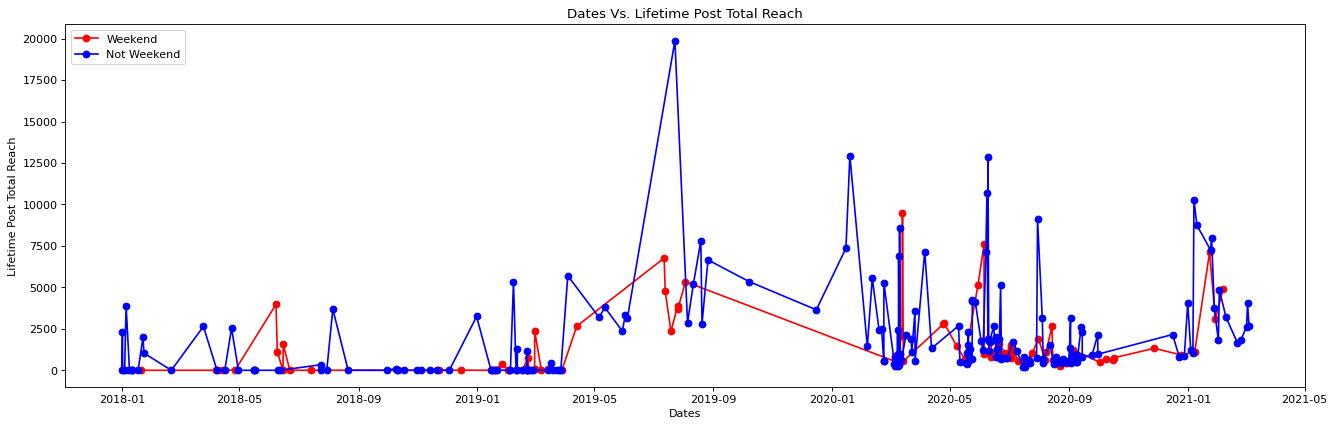

In [27]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(weekend['Posted'],weekend['Lifetime_Post_Total_Reach'], 'r', marker='o', label="Weekend")
plt.plot(notweekend['Posted'],notweekend['Lifetime_Post_Total_Reach'], 'b', marker='o', label="Not Weekend")
plt.title('Dates Vs. Lifetime Post Total Reach')

plt.xlabel('Dates')
plt.ylabel('Lifetime Post Total Reach')
plt.legend(loc="upper left")

plt.show()



*   **Which day meets most views?**



In [28]:
#copy the data
insight2_day=insight2_copy.copy()


In [29]:
#all day separately combined reach
insight2_day = insight2_day.groupby(["day_of_week"]).Lifetime_Post_Total_Reach.sum().reset_index()

In [30]:
insight2_day

,day_of_week,Lifetime_Post_Total_Reach
0,Friday,82508.0
1,Monday,83490.0
2,Saturday,46817.0
3,Sunday,103377.0
4,Thursday,72187.0
5,Tuesday,86522.0
6,Wednesday,42605.0


Text(0, 0.5, 'Lifetime Post Total Reach')

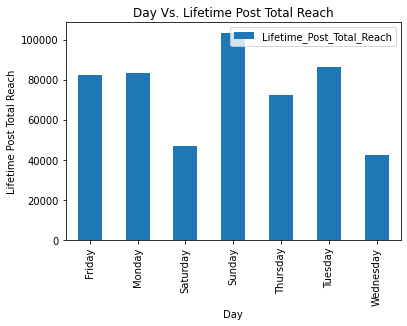

In [31]:
insight2_day.plot( x='day_of_week', y='Lifetime_Post_Total_Reach', kind='bar')
plt.title('Day Vs. Lifetime Post Total Reach')

plt.xlabel('Day')
plt.ylabel('Lifetime Post Total Reach')

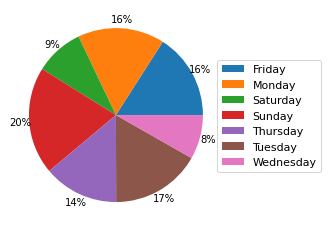

In [32]:
plt.pie(insight2_day['Lifetime_Post_Total_Reach'],autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend(labels = insight2_day['day_of_week'], bbox_to_anchor=(1,0.5), loc="center right", fontsize=11, 
           bbox_transform=plt.gcf().transFigure)



*  **Is posting many contents on the same day make more sense?**



In [33]:
#copy the data
insight2_same=insight2_copy.copy()

In [ ]:
#same day separately combined reach
insight2_day = insight2_day[insight2_day['Dates']]



*   **Which time reach more audience?**



In [35]:
#copy the data
insight2_time=insight2_copy.copy()

In [36]:
#sort by hour
#ascending
insight2_time=insight2_time.sort_values(by = 'Hours')

In [37]:
# reset the index
reset(insight2_time)

<Figure size 1440x432 with 0 Axes>

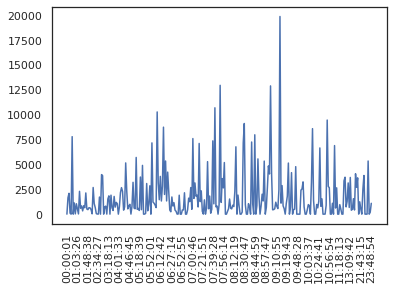

In [101]:
plt.figure(figsize=(20, 6))
labels =insight2_time['Posted'].dt.strftime('%H:%M:%S')
x = np.arange(len(labels))
figure, ax = plt.subplots()
plt.plot(x, insight2_time['Lifetime_Post_Total_Reach'])
plt.xticks(x, labels)
skip_every_n = 10
plt.xticks(rotation=90)
for i, x_label in enumerate(ax.xaxis.get_ticklabels()):
    if i % skip_every_n != 0:
        x_label.set_visible(False)



*   **Which content is with better views?**



In [41]:
#copy the data
insight2_content=insight2_copy.copy()

In [42]:
#Unique Types
n = insight2_content["Type"].unique()
n

array(['Photo', 'Video', 'Link', 'SharedVideo', 'Status', 0], dtype=object)

In [43]:
#Here we see column value has zeros and null, so replace it with Status
insight2_content["Type"] = insight2_content["Type"].str.replace('0', 'Status')
insight2_content["Type"].fillna( 'Status', inplace = True) 

In [44]:
#again check
#Unique Types
n = insight2_content["Type"].unique()
n

array(['Photo', 'Video', 'Link', 'SharedVideo', 'Status'], dtype=object)

In [45]:
#copy for scatter plot
Photo=insight2_content[insight2_content["Type"]=='Photo']
Video=insight2_content[insight2_content["Type"]=='Video']
Link=insight2_content[insight2_content["Type"]=='Link']
SharedVideo=insight2_content[insight2_content["Type"]=='SharedVideo']
Status=insight2_content[insight2_content["Type"]=='Status']

In [46]:
#reseting index
reset(Photo)
reset(Video)
reset(Link)
reset(SharedVideo)
reset(Status)

(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669., 737791., 737911.]),
 <a list of 11 Text major ticklabel objects>)

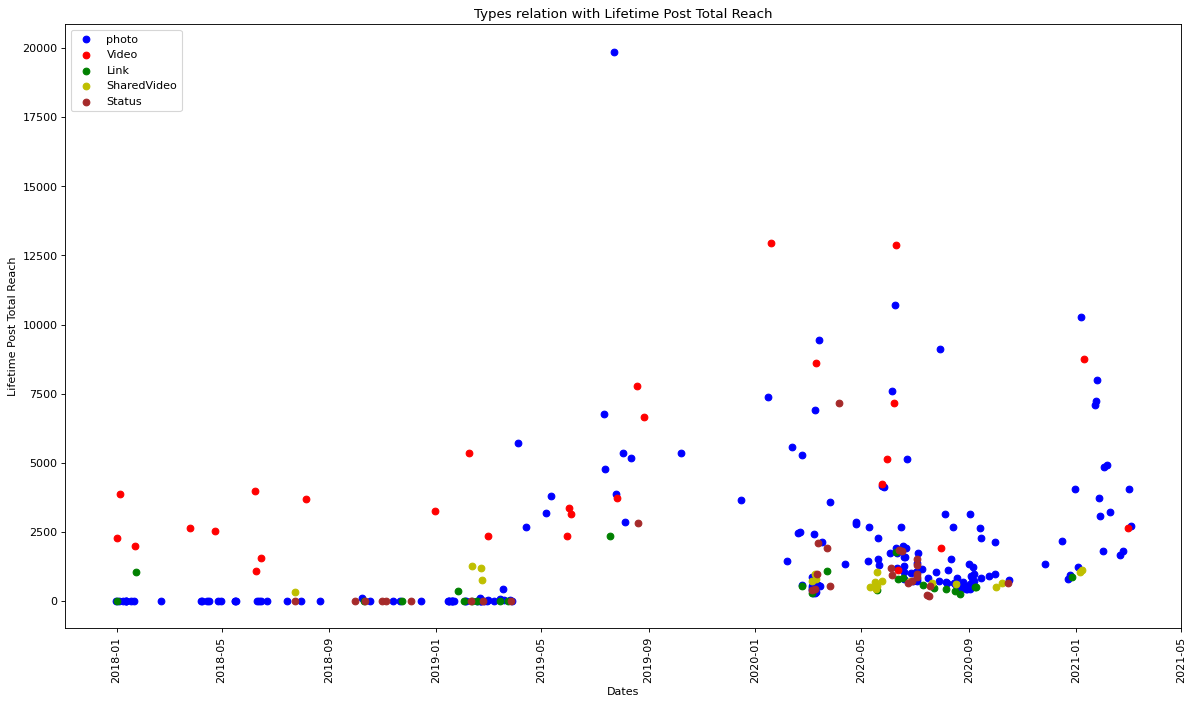

In [47]:
plt.figure(figsize=(18,10), dpi=80)
plt.scatter(x='Posted', y='Lifetime_Post_Total_Reach', color='b',data=Photo, label="photo")
plt.scatter(x='Posted', y='Lifetime_Post_Total_Reach', color='r',data=Video, label="Video")
plt.scatter(x='Posted', y='Lifetime_Post_Total_Reach', color='g',data=Link, label="Link")
plt.scatter(x='Posted', y='Lifetime_Post_Total_Reach', color='y',data=SharedVideo, label="SharedVideo")
plt.scatter(x='Posted', y='Lifetime_Post_Total_Reach', color='brown',data=Status, label="Status")
plt.legend(loc="upper left")
plt.title('Types relation with Lifetime Post Total Reach')
plt.xlabel('Dates')
plt.ylabel('Lifetime Post Total Reach')
plt.xticks(rotation=90)



*   **Corelation Heatmap**



In [49]:
#copy the data
insight2_heatmap=insight2_copy.copy()

In [ ]:
insight2_heatmap.dtypes

In [51]:
del insight2_heatmap["Countries"]

In [52]:
del insight2_heatmap["Languages"]

In [53]:
#converting column types for making heatmap
insight2_heatmap[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach","Lifetime_Post_Paid_Reach",
               "Lifetime_Post_Total_Impressions",
"Lifetime_Post_Organic_Impressions",
"Lifetime_Post_Paid_Impressions",
"Lifetime_Engaged_Users",
"Lifetime_Matched_Audience_Targeting_Consumers_on_Post",
"Lifetime_Matched_Audience_Targeting_Consumptions_on_Post",
"Lifetime_Negative_Feedback_from_Users",
"Lifetime_Negative_Feedback",
"Lifetime_Post_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Post_reach_by_people_who_like_your_Page"
,"Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page"
,"Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post"
,"Lifetime_Organic_views_to_95%"
,"Lifetime_Organic_views_to_95%.1"
,"Lifetime_Paid_views_to_95%"
,"Lifetime_Paid_views_to_95%.1"
,"Lifetime_Organic_Video_Views"
,"Lifetime_Organic_Video_Views.1"
,"Lifetime_Paid_Video_Views"
,"Lifetime_Paid_Video_Views.1"
,"Lifetime_Average_time_video_viewed"
,"Lifetime_Video_length"]] = insight2_copy[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach","Lifetime_Post_Paid_Reach",
               "Lifetime_Post_Total_Impressions",
"Lifetime_Post_Organic_Impressions",
"Lifetime_Post_Paid_Impressions",
"Lifetime_Engaged_Users",
"Lifetime_Matched_Audience_Targeting_Consumers_on_Post",
"Lifetime_Matched_Audience_Targeting_Consumptions_on_Post",
"Lifetime_Negative_Feedback_from_Users",
"Lifetime_Negative_Feedback",
"Lifetime_Post_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Post_reach_by_people_who_like_your_Page"
,"Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page"
,"Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post"
,"Lifetime_Organic_views_to_95%"
,"Lifetime_Organic_views_to_95%.1"
,"Lifetime_Paid_views_to_95%"
,"Lifetime_Paid_views_to_95%.1"
,"Lifetime_Organic_Video_Views"
,"Lifetime_Organic_Video_Views.1"
,"Lifetime_Paid_Video_Views"
,"Lifetime_Paid_Video_Views.1"
,"Lifetime_Average_time_video_viewed"
,"Lifetime_Video_length"]].astype(float, errors = 'raise')

In [54]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = insight2_heatmap.corr()

In [55]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

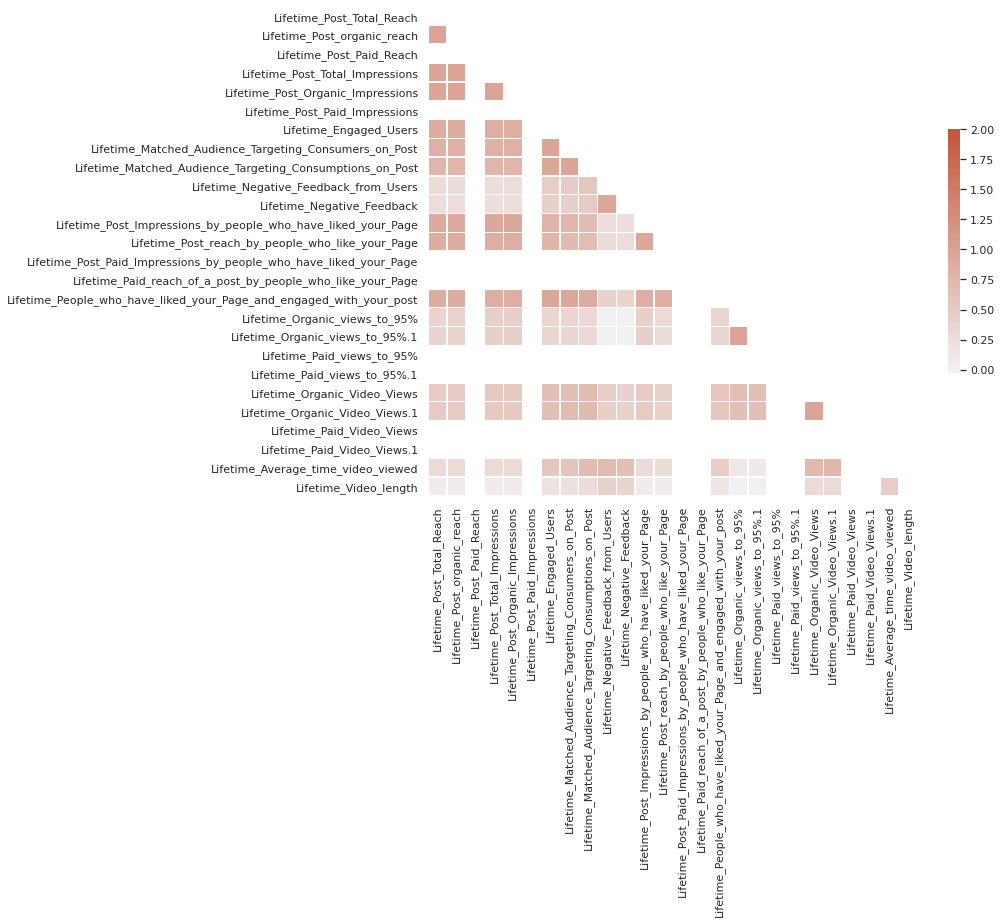

In [56]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
corr, _ = pearsonr(insight2_heatmap["Lifetime_Post_Total_Reach"], insight2_heatmap["Lifetime_Negative_Feedback"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.260




*   **Video length has any effect on views**



In [132]:
#copy the data
insight2_video=insight2_copy.copy()

In [133]:
#converting column types for arithmetic operation
insight2_video[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach","Lifetime_Post_Paid_Reach",
               "Lifetime_Post_Total_Impressions",
"Lifetime_Post_Organic_Impressions",
"Lifetime_Post_Paid_Impressions",
"Lifetime_Engaged_Users",
"Lifetime_Matched_Audience_Targeting_Consumers_on_Post",
"Lifetime_Matched_Audience_Targeting_Consumptions_on_Post",
"Lifetime_Negative_Feedback_from_Users",
"Lifetime_Negative_Feedback",
"Lifetime_Post_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Post_reach_by_people_who_like_your_Page"
,"Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page"
,"Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post"
,"Lifetime_Organic_views_to_95%"
,"Lifetime_Organic_views_to_95%.1"
,"Lifetime_Paid_views_to_95%"
,"Lifetime_Paid_views_to_95%.1"
,"Lifetime_Organic_Video_Views"
,"Lifetime_Organic_Video_Views.1"
,"Lifetime_Paid_Video_Views"
,"Lifetime_Paid_Video_Views.1"
,"Lifetime_Average_time_video_viewed"
,"Lifetime_Video_length"]] = insight2_copy[["Lifetime_Post_Total_Reach", "Lifetime_Post_organic_reach","Lifetime_Post_Paid_Reach",
               "Lifetime_Post_Total_Impressions",
"Lifetime_Post_Organic_Impressions",
"Lifetime_Post_Paid_Impressions",
"Lifetime_Engaged_Users",
"Lifetime_Matched_Audience_Targeting_Consumers_on_Post",
"Lifetime_Matched_Audience_Targeting_Consumptions_on_Post",
"Lifetime_Negative_Feedback_from_Users",
"Lifetime_Negative_Feedback",
"Lifetime_Post_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Post_reach_by_people_who_like_your_Page"
,"Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page"
,"Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page"
,"Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post"
,"Lifetime_Organic_views_to_95%"
,"Lifetime_Organic_views_to_95%.1"
,"Lifetime_Paid_views_to_95%"
,"Lifetime_Paid_views_to_95%.1"
,"Lifetime_Organic_Video_Views"
,"Lifetime_Organic_Video_Views.1"
,"Lifetime_Paid_Video_Views"
,"Lifetime_Paid_Video_Views.1"
,"Lifetime_Average_time_video_viewed"
,"Lifetime_Video_length"]].astype(float, errors = 'raise')

In [134]:
#Post contains Videos
insight2_video=insight2_video[insight2_video["Lifetime_Video_length"]>0.001]

In [135]:
#Converting to second by dividing by 1000
insight2_video["Lifetime_Video_length"]=insight2_video["Lifetime_Video_length"]/1000

In [ ]:
insight2_video

In [136]:
#ascending
insight2_video=insight2_video.sort_values(by = 'Lifetime_Video_length')

In [137]:
#reset index
reset(insight2_video)

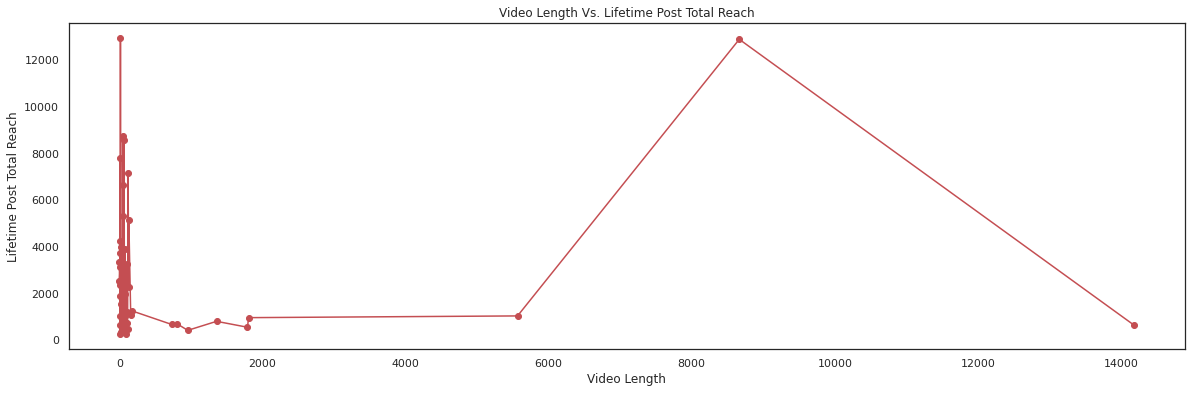

In [138]:
#Video length vs Total Reach
plt.figure(figsize=(20, 6))
plt.plot(insight2_video.Lifetime_Video_length, insight2_video["Lifetime_Post_Total_Reach"], 'r', marker='o')
plt.title('Video Length Vs. Lifetime Post Total Reach')

plt.xlabel('Video Length')
plt.ylabel('Lifetime Post Total Reach')


plt.show()

# **Working with insight1**

**1. Sorting insight1 data by date**

In [102]:
#ascending
insight1=insight1.sort_values(by = 'Date')

In [103]:
#shifting last row to 1st as its 2nd header
insight1=insight1.apply(np.roll, shift=1)

In [104]:
# reset the index
insight1.reset_index(inplace=True)

In [105]:
# delete the index
del insight1['index']

In [106]:
insight1

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,Weekly Organic Reach,28 Days Organic Reach,Daily Paid Reach,Weekly Paid Reach,28 Days Paid Reach,Daily Viral Reach,Weekly Viral Reach,28 Days Viral Reach,Daily Total Impressions,Weekly Total Impressions,28 Days Total Impressions,Daily Organic impressions,Weekly Organic impressions,28 Days Organic impressions,Daily Paid Impressions,Weekly Paid Impressions,28 Days Paid Impressions,Daily Viral impressions,Weekly Viral impressions,28 Days Viral impressions,Daily Logged-in Page Views,Weekly Logged-in Page Views,Daily Logged-in Page Views.1,Weekly Logged-in Page Views.1,Daily Reach Of Page Posts,Weekly Reach Of Page Posts,28 Days Reach Of Page Posts,Daily Organic Reach of Page posts,Weekly Organic Reach of Page posts,...,Daily Total web site click count per Page by age and gender - 45-54.U,Daily Total web site click count per Page by age and gender - 55-64.F,Daily Total web site click count per Page by age and gender - 55-64.M,Daily Total web site click count per Page by age and gender - 55-64.U,Daily Total web site click count per Page by age and gender - 65+.F,Daily Total web site click count per Page by age and gender - 65+.M,Daily Total web site click count per Page by age and gender - 65+.U,Daily Total web site click count per Page by age and gender - &lt;13.F,Daily Total web site click count per Page by age and gender - &lt;13.M,Daily Total web site click count per Page by age and gender - &lt;13.U,Daily Total web site click count per Page by age and gender - UNKNOWN.F,Daily Total web site click count per Page by age and gender - UNKNOWN.M,Daily Total web site click count per Page by age and gender - UNKNOWN.U,Weekly Total web site click count per Page by age and gender - 13-17.F,Weekly Total web site click count per Page by age and gender - 13-17.M,Weekly Total web site click count per Page by age and gender - 13-17.U,Weekly Total web site click count per Page by age and gender - 18-24.F,Weekly Total web site click count per Page by age and gender - 18-24.M,Weekly Total web site click count per Page by age and gender - 18-24.U,Weekly Total web site click count per Page by age and gender - 25-34.F,Weekly Total web site click count per Page by age and gender - 25-34.M,Weekly Total web site click count per Page by age and gender - 25-34.U,Weekly Total web site click count per Page by age and gender - 35-44.F,Weekly Total web site click count per Page by age and gender - 35-44.M,Weekly Total web site click count per Page by age and gender - 35-44.U,Weekly Total web site click count per Page by age and gender - 45-54.F,Weekly Total web site click count per Page by age and gender - 45-54.M,Weekly Total web site click count per Page by age and gender - 45-54.U,Weekly Total web site click count per Page by age and gender - 55-64.F,Weekly Total web site click count per Page by age and gender - 55-64.M,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,NaN,Lifetime: The total number of people who have ...,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Weekly: The number of pe